In [1]:
# Visualizacion del dataset
import pandas as pd

df = pd.read_csv('https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD')
df.to_csv('../Data/raw/Nasa_MeteoriteLanding.csv')
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [2]:
#Revision de la informacion 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


In [3]:
#Revision de datos nulos.
df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [4]:
#Eliminacion de datos nulos.
df.dropna(inplace=True)
df.isna().sum()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [5]:
# Agregada columna 'mass_group' permitira agrupar meteoritos por masa.
df['mass_group'] = pd.qcut(df['mass (g)'], 10, labels=False)
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,mass_group
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",4
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",8
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",9
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",9
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",8
...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)",7
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",5
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)",1
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",9


In [6]:
# Agregadas columnas 'Hemisphere_ns' y 'Hemisphere_ew' que indican en que hemisferio se encontro/cayo cada meteorito. 
df['Hemisphere_ns'] = df['reclat'].apply(lambda x: 'North' if x >= 0 else 'South')
df['Hemisphere_ew'] = df['reclong'].apply(lambda x: 'East' if x >= 0 else 'West')
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,mass_group,Hemisphere_ns,Hemisphere_ew
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",4,North,East
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",8,North,East
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",9,North,West
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",9,North,West
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",8,South,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)",7,North,East
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",5,North,East
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)",1,North,East
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",9,North,East


In [7]:
# Agregada columna 'new_group' que agrupa los meteoritos en base a su masa en 5 tipos (en base a columna mass_group) 
def categorize_mass_group(value):
    if value in [1, 2]:
        return 'muy pequeños'
    elif value in [3, 4]:
        return 'pequeños'
    elif value in [5, 6]:
        return 'medianos'
    elif value in [7, 8]:
        return 'grandes'
    elif value in [9, 10]:
        return 'muy grandes'
    else:
        return value

df['new_group'] = df['mass_group'].apply(categorize_mass_group)
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,mass_group,Hemisphere_ns,Hemisphere_ew,new_group
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",4,North,East,pequeños
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",8,North,East,grandes
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",9,North,West,muy grandes
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",9,North,West,muy grandes
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",8,South,West,grandes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)",7,North,East,grandes
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",5,North,East,medianos
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)",1,North,East,muy pequeños
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",9,North,East,muy grandes


In [8]:
# Agregadas columnas 'geometry' y 'cntry_name' que indican posicion y pais al que corresponde cada coordenada en base a columnas 'reclat' y 'reclong'
import geopandas as gpd
import pandas as pd
import earthpy as et
import shapely
from folium.plugins import MarkerCluster
from shapely.wkt import loads as wkt_loads 
from shapely.geometry import Point

shapefile_path = '../Data/shape/country_shapes.shp'
gdf_countries = gpd.read_file(shapefile_path)
df['geometry'] = df.apply(lambda row: Point(row['reclong'], row['reclat']), axis=1)
gdf_points = gpd.GeoDataFrame(df, geometry='geometry')
gdf_points = gdf_points.set_crs(gdf_countries.crs)
gdf_merged = gpd.sjoin(gdf_points, gdf_countries, how='left', op='within')
df.reset_index(drop=True, inplace=True)
gdf_merged.reset_index(drop=True, inplace=True)

if len(gdf_merged) == len(df):
    df['cntry_name'] = gdf_merged['cntry_name']
else:
    df = df.join(gdf_merged['cntry_name'])

df.head()

C:\Users\ajrob\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,mass_group,Hemisphere_ns,Hemisphere_ew,new_group,geometry,cntry_name
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",4,North,East,pequeños,POINT (6.08333 50.775),Germany
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",8,North,East,grandes,POINT (10.23333 56.18333),Denmark
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",9,North,West,muy grandes,POINT (-113 54.21667),Canada
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",9,North,West,muy grandes,POINT (-99.9 16.88333),Mexico
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",8,South,West,grandes,POINT (-64.95 -33.16667),Argentina


In [9]:
#Revision de todas las columnas 
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation', 'mass_group', 'Hemisphere_ns',
       'Hemisphere_ew', 'new_group', 'geometry', 'cntry_name'],
      dtype='object')

<Axes: xlabel='Hemisphere_ew', ylabel='Count'>

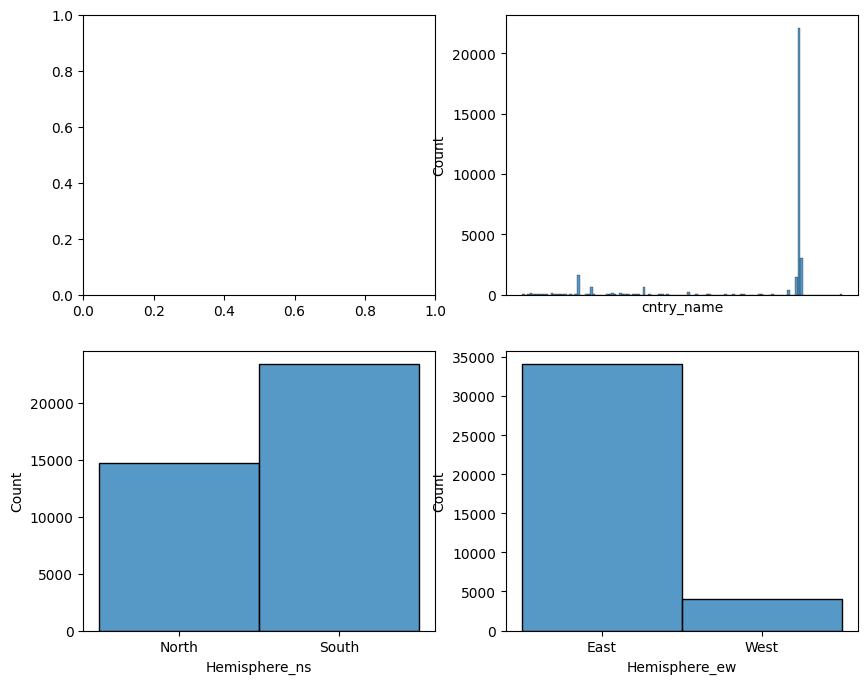

In [10]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#Graficar variables categoricas
fig,axis = plt.subplots(2, 2, figsize=(10,8)) #Graficar variables segun cantidad de variables

#sns.histplot(ax=axis[0,0],data=df,x='new_group')                   ## error en esta linea ##
sns.histplot(ax=axis[0,1],data=df,x='cntry_name').set_xticks([])
sns.histplot(ax=axis[1,0],data=df,x='Hemisphere_ns')
sns.histplot(ax=axis[1,1],data=df,x='Hemisphere_ew')

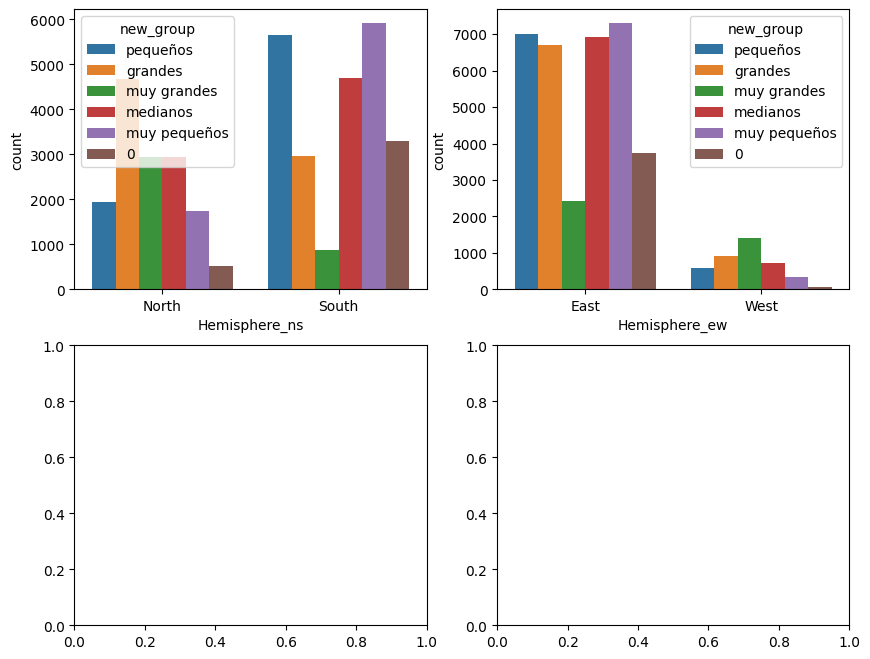

In [11]:
#Analisis multivariante: Categorico-Categorico
fig,axis = plt.subplots(2, 2, figsize=(10,8)) #Graficar variables segun cantidad de variables

sns.countplot(ax=axis[0,0],data=df,x='Hemisphere_ns',hue='new_group')
sns.countplot(ax=axis[0,1],data=df,x='Hemisphere_ew',hue='new_group')

plt.show()

In [12]:
#Analisis multivariante: Numerico-Categorico
#Pasar variables categoricas a numericas
df['new_group_n']=pd.factorize(df['new_group'])[0]                    
df['Hemisphere_ew_n']=pd.factorize(df['Hemisphere_ew'])[0]
df['Hemisphere_ns_n']=pd.factorize(df['Hemisphere_ns'])[0]
df['cntry_name_n']=pd.factorize(df['cntry_name'])[0]
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,mass_group,Hemisphere_ns,Hemisphere_ew,new_group,geometry,cntry_name,new_group_n,Hemisphere_ew_n,Hemisphere_ns_n,cntry_name_n
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",4,North,East,pequeños,POINT (6.08333 50.775),Germany,0,0,0,0
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",8,North,East,grandes,POINT (10.23333 56.18333),Denmark,1,0,0,1
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",9,North,West,muy grandes,POINT (-113 54.21667),Canada,2,1,0,2
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",9,North,West,muy grandes,POINT (-99.9 16.88333),Mexico,2,1,0,3
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",8,South,West,grandes,POINT (-64.95 -33.16667),Argentina,1,1,1,4


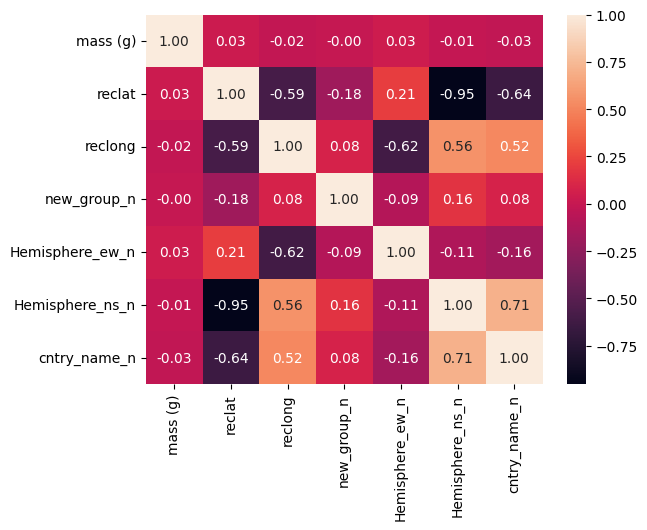

In [13]:
# Analisis de correlacion.
sns.heatmap(df[['mass (g)', 'reclat', 'reclong', 'new_group_n', 'Hemisphere_ew_n', 'Hemisphere_ns_n', 'cntry_name_n']].corr(),annot=True,fmt='.2f')
plt.show()

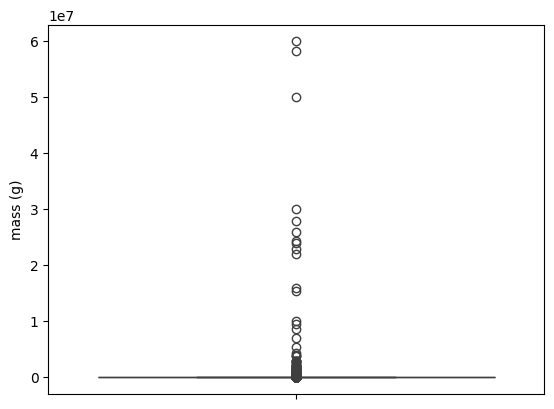

In [14]:
# Determinar Outlayers.
sns.boxplot(data=df,y='mass (g)')
plt.show()